In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Activation,Add,Dense,Conv2D,MaxPooling2D,AveragePooling2D,Flatten,GlobalMaxPooling2D,Dropout,BatchNormalization,Input,Activation,GlobalAveragePooling2D
from keras import callbacks
from tensorflow.keras.utils import to_categorical

In [2]:
train = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\train.csv')
test = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\test.csv')

In [3]:
X = np.array(train[train.columns[1:]])
y = train['label']

In [4]:
y_train = to_categorical(y)

In [5]:
X = X.reshape((X.shape[0],28,28,1))
X_train = X/255

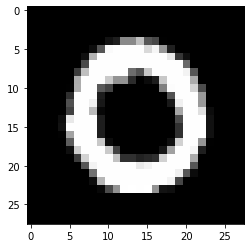

In [6]:
plt.imshow(X_train[1],cmap=plt.cm.gray)

In [7]:
X_train.shape,y_train.shape

((42000, 28, 28, 1), (42000, 10))

In [8]:
def make_model():    
    input_shape = X_train.shape[1:]
    num_classes = 10

    input_layer = Input(input_shape)
    #input_layer = BatchNormalization()(input_layer)


    conv1 = Conv2D(filters=64, kernel_size=3, padding="same", use_bias = False)(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    
    pool1 = MaxPooling2D(3)(conv1)
    pool1 = Dropout(0.2)(pool1)
    
    conv2 = Conv2D(filters=64, kernel_size=3, padding="same", use_bias = False)(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    
    pool2 = MaxPooling2D(3)(conv2)
    pool2 = Dropout(0.2)(pool2)
    
    conv3 = Conv2D(filters=64, kernel_size=3, padding="same", use_bias = False)(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    gap = MaxPooling2D(3)(conv3)
    gap = Flatten()(gap)
    gap = Dropout(0.5)(gap)

    output_layer = Dense(num_classes, activation="softmax")(gap)

    return Model(inputs=input_layer, outputs=output_layer)


model = make_model()

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
callbacks = [callbacks.ModelCheckpoint("D:\\ML\\DL Repo\\digit-recognizer\\model\\best_2D_CNN_model.h5", save_best_only=True, monitor="val_loss"),
             callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
             callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)]

In [11]:
history = model.fit(X_train,y_train,epochs=500,batch_size=128,validation_split=0.2,callbacks=callbacks)

Epoch 1/500
263/263 [==============================] - 13s 10ms/step - loss: 1.3622 - accuracy: 0.5996 - val_loss: 4.0134 - val_accuracy: 0.1131 - lr: 0.0010
Epoch 2/500
263/263 [==============================] - 2s 7ms/step - loss: 0.3731 - accuracy: 0.8817 - val_loss: 0.8941 - val_accuracy: 0.6505 - lr: 0.0010
Epoch 3/500
263/263 [==============================] - 1s 6ms/step - loss: 0.2480 - accuracy: 0.9249 - val_loss: 0.0788 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 4/500
263/263 [==============================] - 1s 6ms/step - loss: 0.1902 - accuracy: 0.9427 - val_loss: 0.0617 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 5/500
263/263 [==============================] - 1s 6ms/step - loss: 0.1590 - accuracy: 0.9532 - val_loss: 0.0558 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 6/500
263/263 [==============================] - 1s 5ms/step - loss: 0.1398 - accuracy: 0.9585 - val_loss: 0.0475 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 7/500
263/263 [==============================] - 2s 7ms/

263/263 [==============================] - 1s 6ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0307 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 54/500
263/263 [==============================] - 1s 6ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0265 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 55/500
263/263 [==============================] - 1s 6ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0275 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 56/500
263/263 [==============================] - 1s 6ms/step - loss: 0.0254 - accuracy: 0.9913 - val_loss: 0.0318 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 56: early stopping


In [12]:
model = keras.models.load_model('D:\\ML\\DL Repo\\digit-recognizer\\model\\best_2D_CNN_model.h5')

In [13]:
X_test = np.array(test).reshape((test.shape[0],28,28,1))
X_test = X_test/255
test_y = model.predict(X_test)

In [14]:
dic = {'ImageId':[],'Label':[]}
for i in range(len(test_y)):
    dic['ImageId'].append(i+1)
    dic['Label'].append(np.argmax(test_y[i]))

In [15]:
test_df = pd.DataFrame.from_dict(dic)
test_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [16]:
test_df.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\Out\\my_submission_file_2D_CNN.csv', index=False)

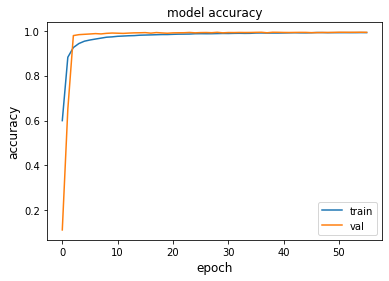

In [17]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        576       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0     

In [19]:
history_pd = pd.DataFrame(history.history)

In [20]:
history_pd.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved training data\\2D_CNN_model_history.csv')

In [21]:
with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\2D_CNN_model_summary.txt','w') as f:
    f.write('```')

In [22]:
def myprint(s):
    with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\2D_CNN_model_summary.txt','a') as f:
        print(s, file=f)
   # with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\1D_CNN_model_summary.txt','a') as f:
        #f.write('```')
model.summary(print_fn = myprint)

In [23]:
with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\2D_CNN_model_summary.txt','a') as f:
    f.write('```')